There are two ways we add data to this figure. We compute representation numbers form theta series up to $15000000$ which is fast as it uses Pari. This is enough for the smallest prime. We take the average of blocks of $1000$ numbers to plot each data point. For larger primes, this is not enough as $15000000$ is only $p^k$ for a very small $k$. So instead we add further points one at a time by solving the Quaternion Embedding Problem, this is slower so we only do it for a few points to fill in the gaps.

We set a randomness seed so the same results are reproducible.

In [1]:
from tqdm import tqdm
load("utils.sage")

def add_theta_series_data(data_idx):
    """
    For a quaternion order Os[data_idx], takes the trace zero norm form, then computes all
    theta series coefficients (representation numbers) up to 15000000,
    counts how many are non-zero (Nth number non-zero -> exists element of norm N, trace 0),
    averages them in batches of 1000, and adds a data point for each batch.
    """
    set_random_seed(0) # Set seed so this is reproducible
    theta_len = 15000000
    batch_size = 1000
    p = ps[data_idx]
    O = Os[data_idx]
    qf = trace_zero_norm_form(O.unit_ideal())
    ts = qf.representation_number_list(theta_len)
    ts = [ZZ(t != 0) for t in ts]
    batch_num = 0
    while True:
        if batch_num*batch_size + batch_size > len(ts):
            break
        points_x[data_idx].append(log(batch_num*batch_size + (batch_size/2), p))
        points_y[data_idx].append(sum(ts[batch_num*batch_size : batch_num*batch_size+batch_size]) / batch_size)
        batch_num += 1

def add_qep_data(data_idx, x_val, batch_size=1000, debug=True):
    """
    For a quaternion order Os[data_idx] takes `batch_size` many numbers N around `p**x_val`,
    solves the quaternion embedding problem for each attempting to find elements with norm N and trace 0,
    adds single data point averaged over all values in the bath.
    """
    set_random_seed(0) # Set seed so this is reproducible
    O = Os[data_idx]
    p = ps[data_idx]
    fbs = floor(batch_size/2)
    rep_arr = [ceil(p^x_val) + r - fbs for r in range(0, batch_size)]
    founds = []
    rangearr = rep_arr
    if debug and tqdm != None:
        rangearr = tqdm(rep_arr)
    for N in rangearr:
        elt = find_element_defining_embedding(O, N, 0)
        founds.append(bool(elt != None))
    points_x[data_idx].append(x_val)
    points_y[data_idx].append(sum(founds) / len(founds))

We store data using sage sessions, just in case sage crashes while generating data

In [2]:
# To start new session
ps = []
Os = []
points_x = []
points_y = []

In [5]:
# To save session data
save_session("embedding probabilities session")

In [1]:
# To load session
load_session("embedding probabilities session")

In [3]:
# Generate data as we did in the paper
#   Be warned it can take 10 hours to run.
#   Once generated, save your session using the cell above, so you don't lose it.
#   In case your Sage installation likes crashing mid computation. Just execute a few of the function calls, then save session, then execute a few more, save again, etc

def sample_maximal_order(p):
    set_random_seed(0) # Set seed so this is reproducible
    B.<i,j,k> = QuaternionAlgebra(p)
    while True:
        O = random_maximal_order(B)
        # Denominators of maximal orders are between 0 and p^(1/2).
        # The smaller the denominator, the closer to O0 and the smaller integers are represented.
        # We force our maximal orders to have larger denominators (> p^0.4), so our probabilities are lower bounds,
        #   and the comparisons are more consistent for different p
        if float(log(order_denominator(O), p)) > 0.40:
            return O

ps = [(2^9).next_prime(),
        (2^12).next_prime(),
        (2^15).next_prime(),
        (2^30).next_prime()]
Os = [sample_maximal_order(p) for p in ps]
points_x = [[] for p in ps]
points_y = [[] for p in ps]

# Adds the bulk of the data points from theta series computations
print("Adding theta series data ...")
for data_idx in range(0, len(ps)):
    add_theta_series_data(data_idx)

# Adds individual data points by solving QEP to fill in the gaps
print("Adding QEP data ...")
add_qep_data(1, 2.1)
add_qep_data(1, 2.2)
add_qep_data(1, 2.3)
add_qep_data(1, 2.4)
add_qep_data(1, 2.5)

add_qep_data(2, 1.7)
add_qep_data(2, 1.8)
add_qep_data(2, 1.9)
add_qep_data(2, 2)
add_qep_data(2, 2.1)
add_qep_data(2, 2.2)
add_qep_data(2, 2.3)
add_qep_data(2, 2.4)
add_qep_data(2, 2.5)

add_qep_data(3, 1)
add_qep_data(3, 1.1)
add_qep_data(3, 1.2)
add_qep_data(3, 1.3, 200)  # Use smaller batches for larger exponents/primes
add_qep_data(3, 1.4, 200)
add_qep_data(3, 1.5, 200)
add_qep_data(3, 1.6, 200)
add_qep_data(3, 1.65, 200)
add_qep_data(3, 1.7, 200)
add_qep_data(3, 1.75, 200)
add_qep_data(3, 1.8, 200)
add_qep_data(3, 1.85, 200)
add_qep_data(3, 1.9, 200)
add_qep_data(3, 1.95, 200)
add_qep_data(3, 2, 200)
add_qep_data(3, 2.1, 200)

Adding theta series data ...


/home/james/sagefork2/sage/src/sage/modules/free_module.py:273: UserWarning: You are constructing a free module
over a noncommutative ring. Sage does not have a concept
of left/right and both sided modules, so be careful.
It's also not guaranteed that all multiplications are
done from the right side.
  warn("You are constructing a free module\n"
/home/james/sagefork2/sage/src/sage/modules/free_module.py:1970: UserWarning: You are constructing a free module
over a noncommutative ring. Sage does not have a concept
of left/right and both sided modules, so be careful.
It's also not guaranteed that all multiplications are
done from the right side.
  warn("You are constructing a free module\n"


Adding QEP data ...


100%|████████████████████████████████████████████████████████████████████████████████████| 200/200 [1:13:25<00:00, 22.03s/it]


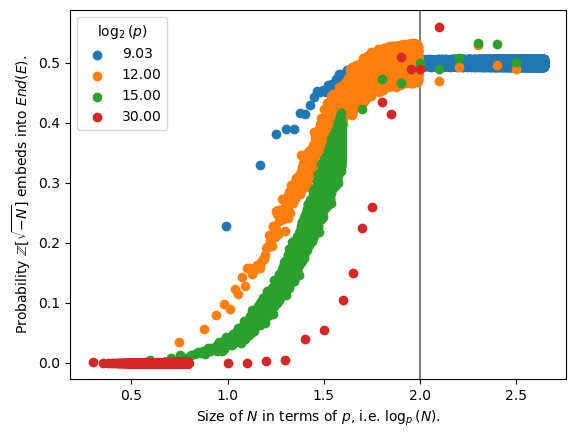

In [2]:
# Plot the data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for data_idx in range(0, len(ps)):
    p = ps[data_idx]
    if data_idx == 0:
        xmin = min(points_x[data_idx])
        xmax = max(points_x[data_idx])
        plt.xscale=((xmin, xmax))
        # plt.axvline(1.0, color="grey", zorder=1)
        plt.axvline(2.0, color="grey", zorder=1)
    scatter = ax.scatter(points_x[data_idx], points_y[data_idx], label=str("%.2f" % round(log(p, 2),2)), zorder=(data_idx + 2))

plt.xlabel(r"Size of $N$ in terms of $p$, i.e. $\log_p(N)$.")
plt.ylabel(r"Probability $\mathbb{Z}[\sqrt{-N}]$ embeds into $End(E)$.")
ax.legend(title=r"$\log_2(p)$")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


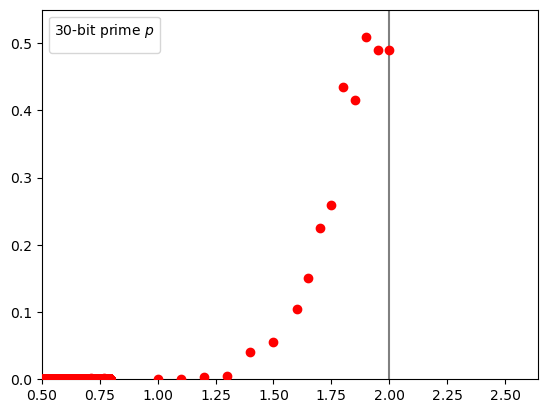

In [8]:
# Plot the data
show_legend = False
axes_labels = False
includes = [3] # [0,1,2,3]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
colors = ["blue", "orange", "green", "red"]

plt.axvline(2.0, color="grey", zorder=1)

for data_idx in includes:
    p = ps[data_idx]
    col = colors[data_idx]
    if show_legend:
        scatter = ax.scatter(points_x[data_idx], points_y[data_idx], label=str("%.2f" % round(log(p, 2),2)), zorder=(data_idx + 2), color=col)
    else:
        scatter = ax.scatter(points_x[data_idx], points_y[data_idx], zorder=(data_idx + 2), color=col)

if axes_labels:
    plt.xlabel(r"Size of $N$ in terms of $p$, i.e. $\log_p(N)$.")
    plt.ylabel(r"Probability $\mathbb{Z}[\sqrt{-N}]$ embeds into $End(E)$.")
if show_legend:
    ax.legend(title=r"$\log_2(p)$", loc='upper left')

xmin = min(points_x[0])
xmax = max(points_x[0])
ax.set_xlim((float(0.5), float(xmax)))
ax.set_ylim((float(0), float(0.55)))
ax.set_axisbelow(True)
ax.legend(title=r"30-bit prime $p$", loc='upper left') # TODO: change this

## Figure 1

Elements of norm around size of discriminant of the lattice (include representations)

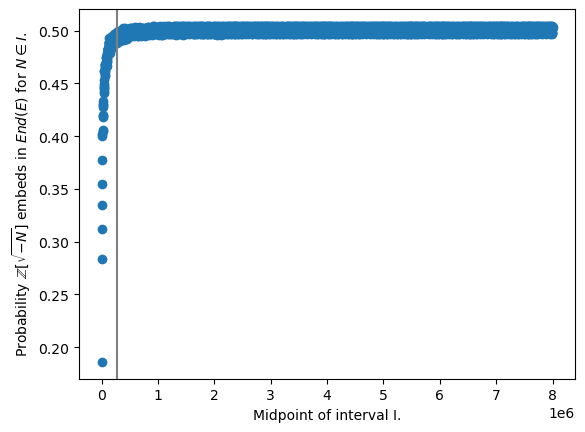

In [103]:
# This is how generate figure ...

import matplotlib.pyplot as plt
load("utils.sage")

p = 521
B.<i,j,k> = QuaternionAlgebra(p)
O = B.quaternion_order([1/2 + 1/90*i + 2/15*j + 268/45*k, 1/45*i + 4/15*j + 536/45*k, 1/2*j + 1/2*k, 15*k])
qf = trace_zero_norm_form(O.unit_ideal())
ts = qf.representation_number_list(8000000)
blocks = [sum(ts[r*2000: (r+1)*2000]) for r in range(0, len(ts)/2000)]
blocks_non_zero = [sum([t != 0 for t in ts[r*2000: (r+1)*2000]])/2000 for r in range(0, len(ts)/2000)]

plt.xlabel(r"Midpoint of interval I.")
plt.ylabel(r"Probability $\mathbb{Z}[\sqrt{-N}]$ embeds in $End(E)$ for $N \in I$.")
plt.scatter([r*2000 + 1000 for r in range(0, len(blocks))], blocks_non_zero)
plt.axvline(p^2, color="grey")